In [1]:
import smbus
import matplotlib.pyplot as plt

from meerkat import mpu6050, parser

In [2]:
i2c = smbus.SMBus(1)
dev = mpu6050.mpu6050(bus=i2c, output='json')

In [3]:
dev.get_temp()

25.894705882352945

In [4]:
dev.set_gyro_range(dev.GYRO_RANGE_1000DEG)
dev.set_accel_range(dev.ACCEL_RANGE_2G)

In [5]:
dev.get_accel_data()

{'x': -19.6133, 'y': 3.864241479492187, 'z': 8.628702783203124}

In [6]:
dev.get_gyro_data()

{'x': -6.067073170731708, 'y': -4.786585365853659, 'z': 5.975609756097562}

In [7]:
dev.get_all_burst(description='example_1', n=2)

[{'desc': 'example_1',
  'n': 1,
  'arange': 0,
  'grange': 16,
  'accel_data': {'x': -19.6133,
   'y': 3.878606689453125,
   'z': 8.834604125976561},
  'gyro_data': {'x': -6.2804878048780495,
   'y': -5.0304878048780495,
   'z': 6.036585365853659},
  'temp_C': 25.847647058823533},
 {'desc': 'example_1',
  'n': 2,
  'arange': 0,
  'grange': 16,
  'accel_data': {'x': -19.6133,
   'y': 3.878606689453125,
   'z': 8.863334545898438},
  'gyro_data': {'x': -6.310975609756098,
   'y': -5.060975609756098,
   'z': 5.853658536585367},
  'temp_C': 25.847647058823533}]

In [8]:
dev = mpu6050.mpu6050(bus=i2c, output='csv')

In [9]:
dev.set_gyro_range(dev.GYRO_RANGE_1000DEG)
dev.set_accel_range(dev.ACCEL_RANGE_2G)

In [10]:
dev.get_all_burst(description='example_1', n=2)

[['example_1',
  1,
  0,
  16,
  -19.6133,
  3.840299462890625,
  8.741230261230468,
  -6.128048780487806,
  -4.908536585365854,
  6.189024390243903,
  25.941764705882356],
 ['example_1',
  2,
  0,
  16,
  -19.6133,
  3.775656018066406,
  8.810662109374999,
  -6.128048780487806,
  -5.2439024390243905,
  6.036585365853659,
  25.894705882352945]]

In [11]:
dev.writer.path = 'MPU6050_example.csv'
dev.write_all(description='example_2', n=10)

In [12]:
m, df = parser.csv_resource(dev.writer.path)

In [13]:
df.head()

,std_time_ms,description,sample_n,arange,grange,ax,ay,az,gx,gy,gz,temp_C,datetime64_ns
0,2019-01-03 21:12:52.329888,example_2,1,0,16,-19.6133,3.881001,8.683769,-6.310976,-4.939024,6.097561,25.894706,2019-01-03 21:12:52.329888
1,2019-01-03 21:12:52.338349,example_2,2,0,16,-19.6133,3.849876,8.602367,-6.371951,-4.969512,6.432927,25.800588,2019-01-03 21:12:52.338349
2,2019-01-03 21:12:52.362723,example_2,3,0,16,-19.6133,3.914520,8.678981,-6.128049,-5.030488,6.128049,25.847647,2019-01-03 21:12:52.362723
3,2019-01-03 21:12:52.370911,example_2,4,0,16,-19.6133,3.818752,8.774749,-6.310976,-4.878049,6.097561,25.800588,2019-01-03 21:12:52.370911
4,2019-01-03 21:12:52.380612,example_2,5,0,16,-19.6133,3.904943,8.822633,-6.310976,-4.847561,6.067073,25.800588,2019-01-03 21:12:52.380612


In [14]:
df.dtypes

std_time_ms              object
description              object
sample_n                  int64
arange                    int64
grange                    int64
ax                      float64
ay                      float64
az                      float64
gx                      float64
gy                      float64
gz                      float64
temp_C                  float64
datetime64_ns    datetime64[ns]
dtype: object

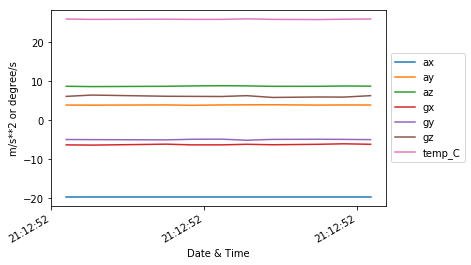

In [15]:
df[['datetime64_ns', 
    'ax', 'ay', 'az', 
    'gx', 'gy', 'gz', 'temp_C']].plot(x='datetime64_ns');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xlabel('Date & Time');
plt.ylabel('m/s**2 or degree/s');